In [1]:
reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


**Notes**: for $\kappa = 1$, there is a transition near $I = 20.4$ (maybe a BZ discretization problem) when considering 2 bands (bcc).


In [2]:
%pylab inline
import scipy.sparse.linalg as LA
import scipy.special as special
import scipy.interpolate as interpolate
import sys
import itertools

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


%load_ext autoreload
%autoreload 2
import periodicLT_3d as LT
import computeL1 as LT1

Populating the interactive namespace from numpy and matplotlib


Sum weights: 1.0 (should be 1)


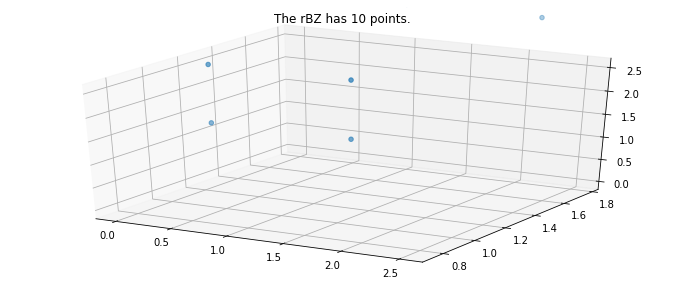

In [3]:
# The rBZ
figsize(12, 5)
Nq = 5
rBZ = LT.BZ(Nq)

print("Sum weights: {} (should be 1)".format(sum(rBZ.weights)))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(rBZ.rBZ[:,0], rBZ.rBZ[:,1], rBZ.rBZ[:,2])
title("The rBZ has {} points.".format(len(rBZ.rBZ)))
_ = axis('equal')

In [4]:
%%time
Nb = 12
rBZ.compute_mDeltaq(Nb)
print("rBZ has {} rkpts".format(len(rBZ.rBZ)))

rBZ has 10 rkpts
CPU times: user 2.19 s, sys: 34.6 ms, total: 2.23 s
Wall time: 2.5 s


In [5]:
%%time
rBZfine = LT.BZ(9)
rBZfine.compute_mDeltaq(Nb)
print("rBZ fine has {} rkpts".format(len(rBZfine.rBZ)))

rBZ fine has 35 rkpts
CPU times: user 7.32 s, sys: 103 ms, total: 7.43 s
Wall time: 8.22 s


In [6]:
%%time
rBZreallyfine = LT.BZ(10)
rBZreallyfine.compute_mDeltaq(Nb)
print("rBZ really fine has {} rkpts".format(len(rBZreallyfine.rBZ)))

rBZ really fine has 56 rkpts
CPU times: user 11.7 s, sys: 160 ms, total: 11.8 s
Wall time: 13 s


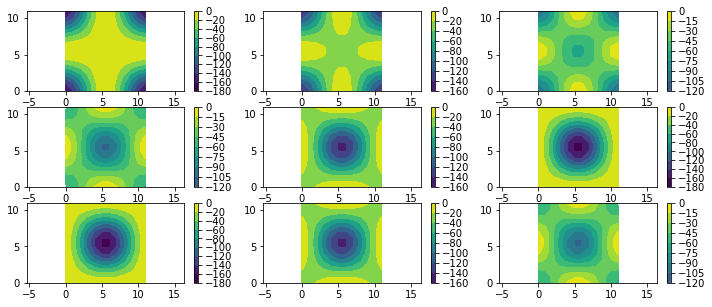

In [7]:
I = 15
V0 = LT.get_V0(rBZ, I, Nb)

for i in range(9):
    subplot(3, 3, i+1)
    contourf(V0[:,:,i], vmax = 0, vmin = amin(V0))
    colorbar()
    axis('equal')
    

For kappa = 1
sum_eigs = 171.8640649760795, integral = 62.623062796762284, L/Lsc > 0.819861179282659
CPU times: user 1.94 s, sys: 189 ms, total: 2.13 s
Wall time: 1.2 s


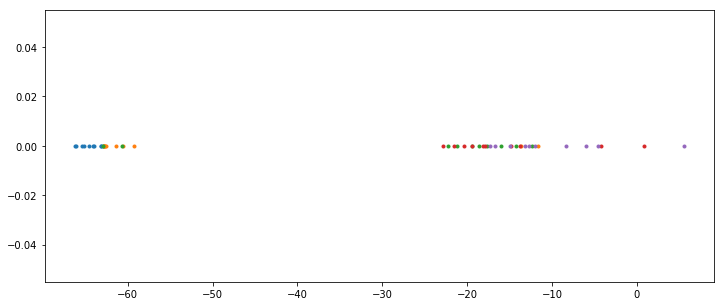

In [680]:
%%time 
neigs = 5 
kappa = 1

eigs, Llt = LT.get_info(V0, rBZ, kappa, neigs = neigs)

Nrq = len(rBZ.rBZ)
for i in range(neigs):
    plot(eigs[:,i], zeros(Nrq), '.')

In [842]:
kappa = 1
I = 40
rho, s, K = LT.compute_rho(V0, rBZ, kappa, neigs = 10)
# Check norm
print("Norm rho = {} (should be 1)".format(LT.Lp_norm(rho, 1)))

Norm rho = 0.984000000000055 (should be 1)


In [9]:
kappa = 1
I = 40

V0 = LT.get_V0(rBZ, I, Nb)
#V0 = V
#V0 = np.load("Data/V0/V010.npy")
V, L, listV, listL = LT.LT_constraint(V0, rBZ, kappa, I, neigs = 2, Niter = 15)


Optimisation with constraint integral = 40, and kappa = 1.
Lsc = 0.006754745576155851
	Iteration  0, I = 40.000, kappa = 1, Vmax - Vmin = 110.649045, LT/Lsc = 0.86299217
	Iteration  1, I = 40.000, kappa = 1, Vmax - Vmin = 127.145253, LT/Lsc = 0.87939999
	Iteration  2, I = 40.000, kappa = 1, Vmax - Vmin = 138.347914, LT/Lsc = 0.88693791
	Iteration  3, I = 40.000, kappa = 1, Vmax - Vmin = 145.416958, LT/Lsc = 0.88990384
	Iteration  4, I = 40.000, kappa = 1, Vmax - Vmin = 149.689726, LT/Lsc = 0.89097145
	Iteration  5, I = 40.000, kappa = 1, Vmax - Vmin = 152.205086, LT/Lsc = 0.89133672
	Iteration  6, I = 40.000, kappa = 1, Vmax - Vmin = 153.661417, LT/Lsc = 0.89145801
	Iteration  7, I = 40.000, kappa = 1, Vmax - Vmin = 154.495877, LT/Lsc = 0.89149758
	Iteration  8, I = 40.000, kappa = 1, Vmax - Vmin = 154.970986, LT/Lsc = 0.89151036
	Iteration  9, I = 40.000, kappa = 1, Vmax - Vmin = 155.240469, LT/Lsc = 0.89151446
	Iteration 10, I = 40.000, kappa = 1, Vmax - Vmin = 155.392980, LT/Lsc = 

In [922]:
V0 = V
V, L, listV, listL = LT.LT_constraint(V0, rBZfine, kappa, I, neigs = 2, Niter = 10)


Optimisation with constraint integral = 180, and kappa = 1.
Lsc = 0.006754745576155851
	Iteration  0, I = 180.000, kappa = 1, Vmax - Vmin = 1162.581768, LT/Lsc = 0.45519819
	Iteration  1, I = 180.000, kappa = 1, Vmax - Vmin = 1164.655401, LT/Lsc = 0.45532246
	Iteration  2, I = 180.000, kappa = 1, Vmax - Vmin = 1164.901006, LT/Lsc = 0.45532456
	Iteration  3, I = 180.000, kappa = 1, Vmax - Vmin = 1164.932058, LT/Lsc = 0.45532459
	Iteration  4, I = 180.000, kappa = 1, Vmax - Vmin = 1164.936022, LT/Lsc = 0.45532460
Convergence after 4 iterations


For kappa = 1
sum_eigs = 60.938014342031565, integral = 40.00000000000001, L/Lsc > 0.891516375580937


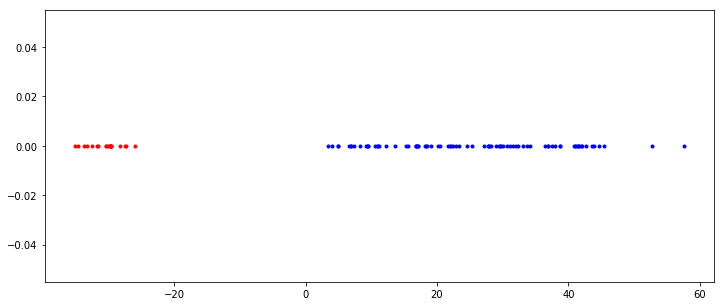

In [11]:
neigs = 10

eigs, Llt = LT.get_info(V, rBZ, kappa, neigs = neigs)
eigs.sort(axis=1)

Nrq = len(rBZ.rBZ)
for i in range(neigs):
    if i < 2: c = '.r'
    else:     c = '.b'
    plot(eigs[:,i], zeros(Nrq), c)

In [12]:
print("I = {}, Vmin = {:.6f}, Vmax = {:.6f}".format(I, amin(V), amax(V)))
for i in range(9):
    subplot(3, 3, i+1)
    contourf(V[:,:,i], vmax=amax(V), vmin=amin(V))
    colorbar()
    axis('equal')

I = 40, Vmin = -161.273564, Vmax = -5.702705


In [803]:
V0 = V
V, L, listV, listL = LT.LT_constraint(V0, rBZreallyfine, kappa, I, neigs = 2, Niter = 10)


Optimisation with constraint integral = 20.397, and kappa = 1.
Lsc = 0.006754745576155851
	Iteration  0, I = 20.397, kappa = 1, LT/Lsc = 0.99823822
	Iteration  1, I = 20.397, kappa = 1, LT/Lsc = 0.99824879
	Iteration  2, I = 20.397, kappa = 1, LT/Lsc = 0.99825750
	Iteration  3, I = 20.397, kappa = 1, LT/Lsc = 0.99825960
	Iteration  4, I = 20.397, kappa = 1, LT/Lsc = 0.99826010
	Iteration  5, I = 20.397, kappa = 1, LT/Lsc = 0.99826023
	Iteration  6, I = 20.397, kappa = 1, LT/Lsc = 0.99826026


KeyboardInterrupt: 

In [740]:
neigs = 5

eigs, Llt = LT.get_info(V, rBZfine, kappa, neigs = neigs)
eigs.sort(axis=1)

Nrq = len(rBZfine.rBZ)
for i in range(neigs):
    if i < 3: c = '.r'
    else:     c = '.b'
    plot(eigs[:,i], zeros(Nrq), c)

For kappa = 0.95
sum_eigs = 12.136326554185834, integral = 20.999999999999996, L/Lsc > 1.000215060128976


## Image for kappa fixed

In [496]:
%%time
Nq = 5
Nb = 10

print("computing rBZ")
rBZ = LT.BZ(Nq)
rBZ.compute_mDeltaq(Nb)

computing rBZ
CPU times: user 1.15 s, sys: 18 ms, total: 1.16 s
Wall time: 1.16 s


In [13]:
kappa = 1
II = linspace(40, 20, 11)
neigs = 2

V0 = LT.get_V0(rBZ, II[0], Nb)
V0 = V
#V0 = np.load("Data/V0/V010.npy")

VIrecord, LIrecord = [], []

for I in II:
    V, L, _, _ = LT.LT_constraint(V0, rBZ, kappa, I, neigs = neigs, Niter = 30)
    V0 = V
    VIrecord.append(V)
    LIrecord.append(L)


Optimisation with constraint integral = 40.0, and kappa = 1.
Lsc = 0.006754745576155851
	Iteration  0, I = 40.000, kappa = 1, Vmax - Vmin = 155.579612, LT/Lsc = 0.89151638
	Iteration  1, I = 40.000, kappa = 1, Vmax - Vmin = 155.584551, LT/Lsc = 0.89151638
Convergence after 1 iterations

Optimisation with constraint integral = 38.0, and kappa = 1.
Lsc = 0.006754745576155851
	Iteration  0, I = 38.000, kappa = 1, Vmax - Vmin = 143.705125, LT/Lsc = 0.89749266
	Iteration  1, I = 38.000, kappa = 1, Vmax - Vmin = 141.279611, LT/Lsc = 0.89790914
	Iteration  2, I = 38.000, kappa = 1, Vmax - Vmin = 139.864485, LT/Lsc = 0.89804115
	Iteration  3, I = 38.000, kappa = 1, Vmax - Vmin = 139.046495, LT/Lsc = 0.89808409
	Iteration  4, I = 38.000, kappa = 1, Vmax - Vmin = 138.574878, LT/Lsc = 0.89809824
	Iteration  5, I = 38.000, kappa = 1, Vmax - Vmin = 138.302911, LT/Lsc = 0.89810294
	Iteration  6, I = 38.000, kappa = 1, Vmax - Vmin = 138.145937, LT/Lsc = 0.89810450
	Iteration  7, I = 38.000, kappa = 

	Iteration  4, I = 28.000, kappa = 1, Vmax - Vmin = 47.993682, LT/Lsc = 0.94434373
	Iteration  5, I = 28.000, kappa = 1, Vmax - Vmin = 46.829100, LT/Lsc = 0.94459445
	Iteration  6, I = 28.000, kappa = 1, Vmax - Vmin = 45.879752, LT/Lsc = 0.94476142
	Iteration  7, I = 28.000, kappa = 1, Vmax - Vmin = 45.101157, LT/Lsc = 0.94487393
	Iteration  8, I = 28.000, kappa = 1, Vmax - Vmin = 44.459538, LT/Lsc = 0.94495043
	Iteration  9, I = 28.000, kappa = 1, Vmax - Vmin = 43.928800, LT/Lsc = 0.94500283
	Iteration 10, I = 28.000, kappa = 1, Vmax - Vmin = 43.488466, LT/Lsc = 0.94503893
	Iteration 11, I = 28.000, kappa = 1, Vmax - Vmin = 43.122264, LT/Lsc = 0.94506391
	Iteration 12, I = 28.000, kappa = 1, Vmax - Vmin = 42.817128, LT/Lsc = 0.94508126
	Iteration 13, I = 28.000, kappa = 1, Vmax - Vmin = 42.562479, LT/Lsc = 0.94509335
	Iteration 14, I = 28.000, kappa = 1, Vmax - Vmin = 42.349696, LT/Lsc = 0.94510179
	Iteration 15, I = 28.000, kappa = 1, Vmax - Vmin = 42.171710, LT/Lsc = 0.94510770
	Ite

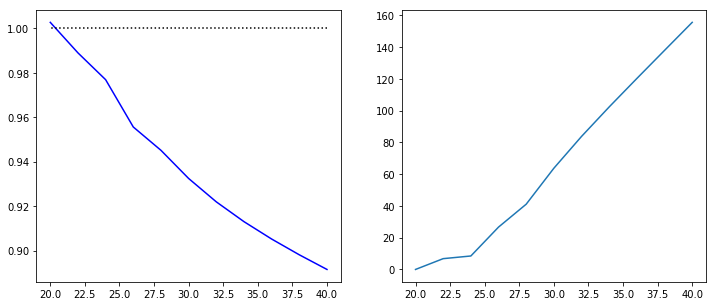

In [14]:
LI = array(LIrecord)
L1 = LT1.L1(kappa)
Lsc = LT.Lsc(kappa)
iI = len(VIrecord)

subplot(121)
plot(II[:iI], LIrecord/Lsc, 'b')
plot(II[:iI], ones(len(VIrecord)), ':k')
#plot(II, L1/Lsc*ones(len(II)), 'k')

subplot(122)
plot(II[:iI], [amax(V) - amin(V) for V in VIrecord])

In [940]:
name = "3d_kappa{:6d}_allI".format(int(100000*kappa))
dico_record = {
    "Nb": Nb,
    "Nq": Nq,
    "kappa": kappa,
    "II": II,
    "VIrecord": VIrecord,
    "LIrecord": LIrecord
}
print(name)

3d_kappa100000_allI


In [941]:
np.save("Data/"+name, dico_record)

I = 22.0, Vmax - Vmin = 6.800384, L/Lsc = 0.988967


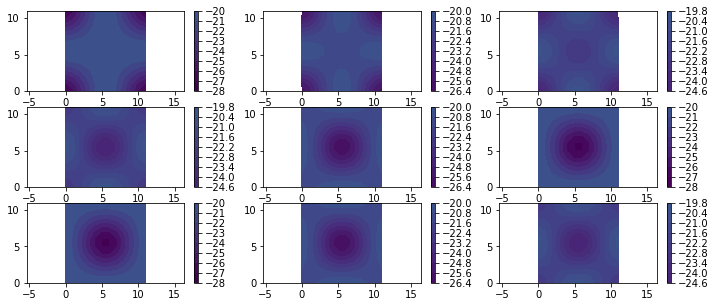

In [15]:
iI = 9
V = VIrecord[iI]

print("I = {}, Vmax - Vmin = {:.6f}, L/Lsc = {:6f}".format(II[iI], amax(V)-amin(V), LIrecord[iI]/LT.Lsc(kappa)))

for i in range(9):
    subplot(3, 3, i+1)
    contourf(V[:,:,i], vmax=0, vmin=amin(V))
    colorbar()
    axis('equal')

For kappa = 1
sum_eigs = 15.256149604115645, integral = 22.000000000000004, L/Lsc > 0.9948995655171453


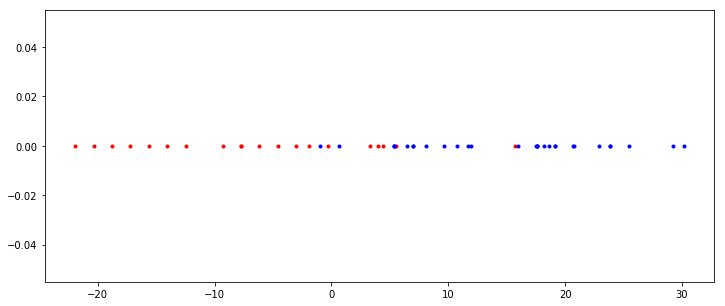

In [19]:
neigs = 5

eigs, Llt = LT.get_info(V, rBZ, kappa, neigs = neigs)
eigs.sort(axis=1)

Nrq = len(rBZ.rBZ)
for i in range(neigs):
    if i < 2: c = '.r'
    else:     c = '.b'
    plot(eigs[:,i], zeros(Nrq), c)

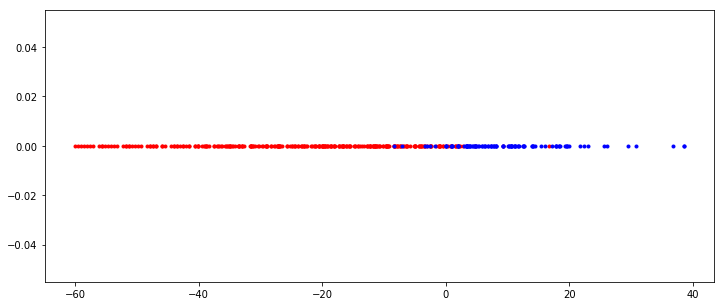

In [910]:
Nrq = len(rBZfine.rBZ)
for i in range(neigs):
    if i < 8: c = '.r'
    else:     c = '.b'
    plot(eigs[:,i], zeros(Nrq), c)